成功读取文件: D:\chrome_download\1753689672161moore.csv
数据行数: 874142


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 26399 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20132 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 26131 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 31508 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 25968 missing from c

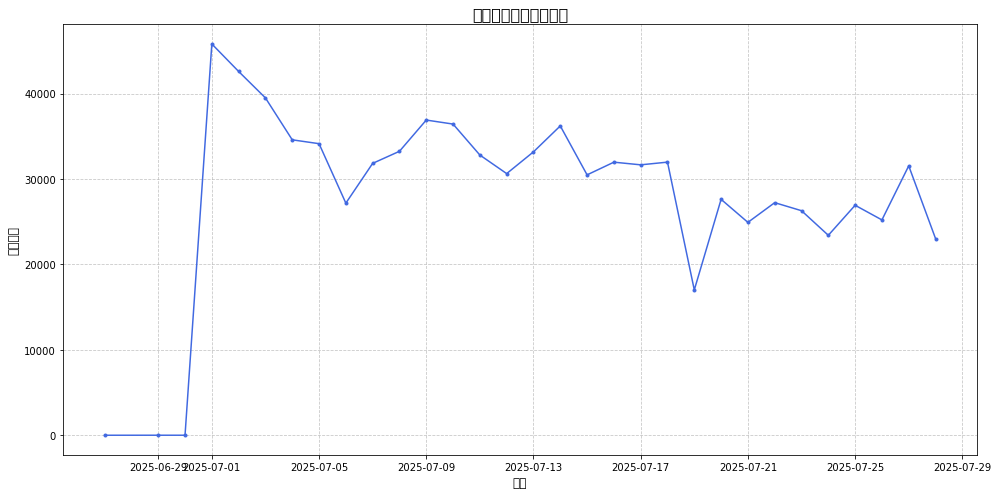

AttributeError: 'str' object has no attribute 'parent'

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

file_path = r"D:\chrome_download\1753689672161moore.csv"
# 2. 读取CSV文件（只读取需要的列）
try:
    df = pd.read_csv(
        file_path, 
        parse_dates=['trade_date'], 
        usecols=['trade_date', 'amount']
    )
    
    print(f"成功读取文件: {file_path}")
    print(f"数据行数: {len(df)}")
    
except FileNotFoundError:
    print(f"错误: 找不到文件 {file_path}")
    print("请检查路径是否正确")
    exit()
except Exception as e:
    print(f"读取文件时出错: {e}")
    exit()

# 3. 按天统计交易笔数
df['date_only'] = df['trade_date'].dt.date
daily_transactions = df.groupby('date_only').size().reset_index(name='count')

# 4. 绘制交易笔数变化图
plt.figure(figsize=(14, 7))
plt.plot(daily_transactions['date_only'], daily_transactions['count'], 
         marker='o', linestyle='-', markersize=3, color='royalblue')
plt.title('每日交易笔数变化趋势', fontsize=16)
plt.xlabel('日期', fontsize=12)
plt.ylabel('交易笔数', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 5. 保存统计结果到新CSV
output_path = file_path.parent / "每日交易统计.csv"
daily_transactions.to_csv(output_path, index=False)
print(f"统计结果已保存到: {output_path}")

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import time
import numpy as np

# 1. 指定CSV文件路径
file_path = r"D:\chrome_download\1753689672161moore.csv"

# 2. 金额区间定义
amount_bins = [0, 100, 500, 150000, float('inf')]
amount_labels = ['0-100', '101-500', '501-150,000', '150,000以上']
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3']  # 区间颜色

# 3. 记录开始时间
start_time = time.time()

try:
    # 4. 读取数据
    print("正在读取文件...")
    df = pd.read_csv(
        file_path, 
        usecols=['trade_date', 'amount'],
        dtype={'amount': float}
    )
    
    # 5. 数据预处理
    print("数据处理中...")
    # 直接使用原始日期字符串
    df['date'] = df['trade_date']
    
    # 创建金额区间列（使用整数区间代码）
    df['amount_category'] = pd.cut(
        df['amount'], 
        bins=amount_bins, 
        labels=range(len(amount_labels)),  # 使用0,1,2,3作为区间代码
        include_lowest=True
    )
    
    # 6. 按天统计交易笔数
    daily_total = df.groupby('date').size().reset_index(name='total_count')
    
    # 7. 使用分组统计金额区间分布（避免crosstab问题）
    print("统计金额区间分布...")
    
    # 方法1：使用分组和unstack
    daily_by_amount = (
        df.groupby(['date', 'amount_category'])
        .size()
        .unstack(fill_value=0)
        .reset_index()
    )
    
    # 重命名列为金额标签
    daily_by_amount.columns = ['date'] + amount_labels
    
    # 8. 合并统计结果
    daily_stats = daily_total.merge(daily_by_amount, on='date', how='left')
    
    # 9. 确保所有金额区间列都存在
    for label in amount_labels:
        if label not in daily_stats.columns:
            daily_stats[label] = 0
    
    # 10. 按日期排序
    daily_stats = daily_stats.sort_values('date')
    
    # 11. 计算处理时间
    process_time = time.time() - start_time
    print(f"数据处理完成，耗时 {process_time:.2f} 秒")
    print(f"日期范围: {daily_stats['date'].min()} 至 {daily_stats['date'].max()}")
    print(f"总交易笔数: {daily_stats['total_count'].sum():,}")
    
    # 12. 创建可视化图表
    plt.figure(figsize=(18, 15))
    plt.suptitle('每日交易笔数与金额区间分布分析', fontsize=20, fontweight='bold')
    
    # 12.1 总交易笔数变化
    ax1 = plt.subplot(3, 1, 1)
    
    # 使用数值索引绘图
    x = np.arange(len(daily_stats))
    
    plt.plot(x, daily_stats['total_count'], 
             marker='o', markersize=4, linestyle='-', linewidth=1.5, 
             color='#1f77b4', alpha=0.8)
    
    # 标注最高值和最低值
    max_idx = daily_stats['total_count'].idxmax()
    min_idx = daily_stats['total_count'].idxmin()
    
    plt.scatter(x[max_idx], daily_stats.loc[max_idx, 'total_count'], 
                color='green', s=100, zorder=5)
    plt.scatter(x[min_idx], daily_stats.loc[min_idx, 'total_count'], 
                color='red', s=100, zorder=5)
    
    # 添加文本标注
    plt.annotate(f"峰值: {daily_stats.loc[max_idx, 'total_count']}笔\n{daily_stats.loc[max_idx, 'date']}", 
                 (x[max_idx], daily_stats.loc[max_idx, 'total_count']),
                 xytext=(0, 15), textcoords='offset points', ha='center', fontsize=10,
                 bbox=dict(boxstyle='round,pad=0.5', fc='lightgreen', alpha=0.7))
    
    plt.annotate(f"谷值: {daily_stats.loc[min_idx, 'total_count']}笔\n{daily_stats.loc[min_idx, 'date']}", 
                 (x[min_idx], daily_stats.loc[min_idx, 'total_count']),
                 xytext=(0, -25), textcoords='offset points', ha='center', fontsize=10,
                 bbox=dict(boxstyle='round,pad=0.5', fc='lightcoral', alpha=0.7))
    
    # 添加平均线
    mean_value = daily_stats['total_count'].mean()
    plt.axhline(y=mean_value, color='r', linestyle='--', 
                label=f'平均值: {mean_value:.1f}笔/天')
    
    plt.title('每日总交易笔数变化', fontsize=16)
    plt.xlabel('日期')
    plt.ylabel('交易笔数')
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.legend()
    
    # 设置X轴标签为日期
    plt.xticks(x, daily_stats['date'], rotation=45, ha='right')
    
    # 优化显示间隔
    n = len(daily_stats)
    skip = max(1, n // 30)  # 每30个日期显示一个标签
    for i, tick in enumerate(ax1.get_xticklabels()):
        if i % skip != 0:
            tick.set_visible(False)
    
    # 12.2 金额区间分布（堆叠面积图） - 修复这里的语法错误
    ax2 = plt.subplot(3, 1, 2)
    
    # 准备堆叠数据
    stack_data = daily_stats[amount_labels].copy()
    
    # 绘制堆叠面积图 - 修复语法错误
    y_data = [stack_data[label] for label in amount_labels]
    ax2.stackplot(
        x, 
        *y_data,  # 使用解包操作符
        colors=colors, 
        alpha=0.8,
        labels=amount_labels
    )
    
    plt.title('每日交易金额区间分布', fontsize=16)
    plt.xlabel('日期')
    plt.ylabel('交易笔数')
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.legend(title='金额区间', loc='upper left')
    
    # 设置X轴标签为日期
    plt.xticks(x, daily_stats['date'], rotation=45, ha='right')
    
    # 优化显示间隔
    for i, tick in enumerate(ax2.get_xticklabels()):
        if i % skip != 0:
            tick.set_visible(False)
    
    # 12.3 金额区间占比（百分比堆叠柱状图）
    ax3 = plt.subplot(3, 1, 3)
    
    # 计算百分比
    percent_data = stack_data.div(stack_data.sum(axis=1), axis=0) * 100
    
    # 绘制百分比堆叠柱状图
    bottom = np.zeros(len(percent_data))
    for i, label in enumerate(amount_labels):
        ax3.bar(
            x, 
            percent_data[label], 
            bottom=bottom, 
            color=colors[i], 
            width=0.8,
            label=label
        )
        bottom += percent_data[label]
    
    plt.title('每日交易金额区间占比', fontsize=16)
    plt.xlabel('日期')
    plt.ylabel('占比 (%)')
    plt.grid(True, axis='y', linestyle='--', alpha=0.3)
    plt.legend(title='金额区间', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)
    
    # 设置X轴标签为日期
    plt.xticks(x, daily_stats['date'], rotation=45, ha='right')
    
    # 优化显示间隔
    for i, tick in enumerate(ax3.get_xticklabels()):
        if i % skip != 0:
            tick.set_visible(False)
    
    # 13. 添加整体统计信息
    total_stats = df.groupby('amount_category').size().reset_index(name='count')
    total_stats['amount_category'] = total_stats['amount_category'].map(
        dict(enumerate(amount_labels)))
    total_stats['percentage'] = (total_stats['count'] / total_stats['count'].sum()) * 100
    
    stats_text = "\n".join([
        f"总交易笔数: {total_stats['count'].sum():,}",
        f"金额区间分布:",
        f"  • 0-100元: {total_stats.loc[0, 'count']:,}笔 ({total_stats.loc[0, 'percentage']:.1f}%)",
        f"  • 101-500元: {total_stats.loc[1, 'count']:,}笔 ({total_stats.loc[1, 'percentage']:.1f}%)",
        f"  • 501-150,000元: {total_stats.loc[2, 'count']:,}笔 ({total_stats.loc[2, 'percentage']:.1f}%)",
        f"  • 150,000元以上: {total_stats.loc[3, 'count']:,}笔 ({total_stats.loc[3, 'percentage']:.1f}%)"
    ])
    
    plt.figtext(0.5, 0.01, stats_text, ha='center', fontsize=12, 
                bbox=dict(facecolor='lightgrey', alpha=0.5))
    
    # 14. 调整布局并保存
    plt.tight_layout(rect=[0, 0.05, 1, 0.97])  # 为底部文本留空间
    
    # 保存图表
    output_image = file_path.parent / "交易笔数与金额分布分析.png"
    plt.savefig(output_image, dpi=150, bbox_inches='tight')
    print(f"图表已保存到: {output_image}")
    
    # 15. 保存统计结果到CSV
    output_csv = file_path.parent / "每日交易统计.csv"
    
    # 重新排序列
    columns = ['date', 'total_count'] + amount_labels
    daily_stats = daily_stats[columns]
    
    # 重命名列
    daily_stats.columns = ['日期', '总交易笔数'] + amount_labels
    
    daily_stats.to_csv(output_csv, index=False, encoding='utf-8-sig')
    print(f"统计结果已保存到: {output_csv}")
    
    # 16. 显示图表
    plt.show()
    
    # 17. 打印处理时间
    total_time = time.time() - start_time
    print(f"处理完成，总耗时 {total_time:.2f} 秒")

except FileNotFoundError:
    print(f"错误: 找不到文件 {file_path}")
    print("请检查路径是否正确")
except KeyError as e:
    print(f"错误: 未找到列名 {e}")
    print("请确认您的CSV文件中包含正确的日期和金额列名")
    print("提示: 列名区分大小写，请检查实际列名")
except Exception as e:
    print(f"处理过程中出错: {e}")
    import traceback
    traceback.print_exc()

正在读取文件...
数据处理中...
统计金额区间分布...
处理过程中出错: 'fill_value=date' is not present in this Categorical's categories


Traceback (most recent call last):
  File "<ipython-input-10-77b3afbe13b7>", line 48, in <module>
    df.groupby(['date', 'amount_category'])
  File "C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py", line 5016, in reset_index
    new_obj.insert(0, name, level_values)
  File "C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py", line 3763, in insert
    self._mgr.insert(loc, column, value, allow_duplicates=allow_duplicates)
  File "C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\internals\managers.py", line 1197, in insert
    new_axis = self.items.insert(loc, item)
  File "C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexes\extension.py", line 379, in insert
    code = arr._validate_scalar(item)
  File "C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\categorical.py", line 1251, in _validate_fill_value
    raise TypeError(
TypeError: 'fill_value=date' is not present in this Categorical's categories


正在读取文件...
数据处理中...
统计金额区间分布...
数据处理完成，耗时 2.64 秒
日期范围: 2025/6/27 至 2025/7/9
总交易笔数: 874,142


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 26399 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20132 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 26131 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 31508 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 25968 missing from c

处理过程中出错: 'str' object has no attribute 'parent'


Traceback (most recent call last):
  File "<ipython-input-11-25e0c30e7997>", line 218, in <module>
    output_image = file_path.parent / "交易笔数与金额分布分析.png"
AttributeError: 'str' object has no attribute 'parent'
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 26399 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 20132 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 26131 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning:

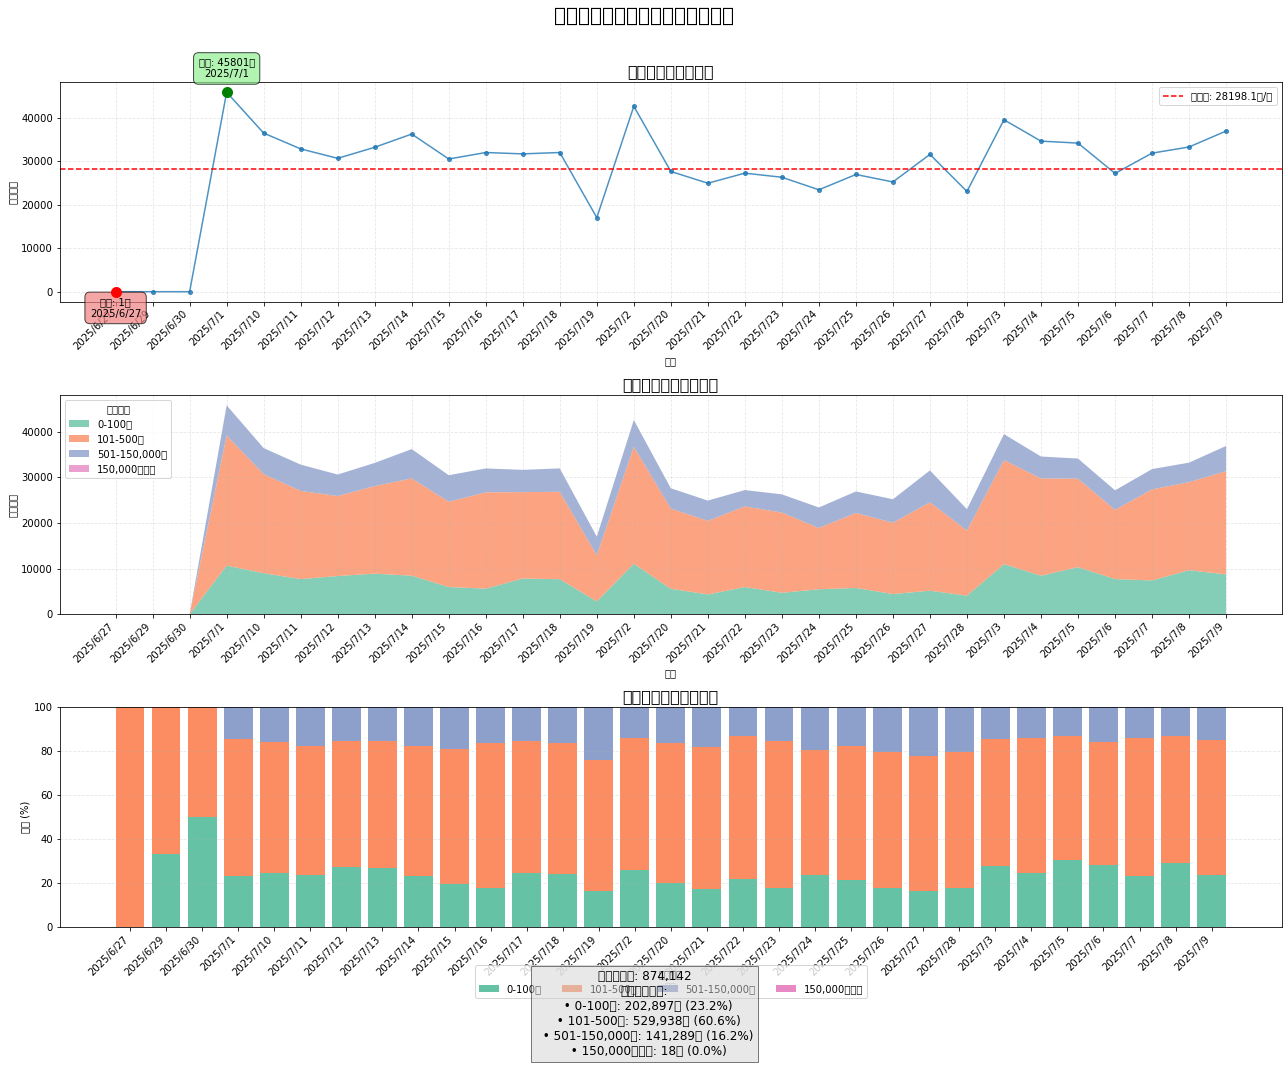

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import time
import numpy as np

# 1. 指定CSV文件路径
file_path = r"D:\chrome_download\1753689672161moore.csv"

# 2. 金额区间定义
amount_bins = [0, 100, 500, 150000, float('inf')]
amount_labels = ['0-100元', '101-500元', '501-150,000元', '150,000元以上']
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3']  # 区间颜色

# 3. 记录开始时间
start_time = time.time()

try:
    # 4. 读取数据
    print("正在读取文件...")
    df = pd.read_csv(
        file_path, 
        usecols=['trade_date', 'amount'],
        dtype={'amount': float}
    )
    
    # 5. 数据预处理
    print("数据处理中...")
    # 直接使用原始日期字符串
    df['date'] = df['trade_date'].astype(str)
    
    # 创建金额区间列 - 使用pd.cut但避免分类数据类型问题
    df['amount_category'] = pd.cut(
        df['amount'], 
        bins=amount_bins, 
        labels=amount_labels,  # 直接使用字符串标签
        include_lowest=True
    ).astype(str)  # 转换为字符串类型
    
    # 6. 按天统计交易笔数
    daily_total = df.groupby('date').size().reset_index(name='total_count')
    
    # 7. 使用分组统计金额区间分布
    print("统计金额区间分布...")
    
    # 使用pivot_table替代groupby
    pivot_df = df.pivot_table(
        index='date',
        columns='amount_category',
        aggfunc='size',
        fill_value=0
    ).reset_index()
    
    # 确保所有金额区间列都存在
    for label in amount_labels:
        if label not in pivot_df.columns:
            pivot_df[label] = 0
    
    # 8. 合并统计结果
    daily_stats = daily_total.merge(pivot_df, on='date', how='left')
    
    # 9. 按日期排序
    daily_stats = daily_stats.sort_values('date')
    
    # 10. 计算处理时间
    process_time = time.time() - start_time
    print(f"数据处理完成，耗时 {process_time:.2f} 秒")
    print(f"日期范围: {daily_stats['date'].min()} 至 {daily_stats['date'].max()}")
    print(f"总交易笔数: {daily_stats['total_count'].sum():,}")
    
    # 11. 创建可视化图表
    plt.figure(figsize=(18, 15))
    plt.suptitle('每日交易笔数与金额区间分布分析', fontsize=20, fontweight='bold')
    
    # 11.1 总交易笔数变化
    ax1 = plt.subplot(3, 1, 1)
    
    # 使用数值索引绘图
    x = np.arange(len(daily_stats))
    
    plt.plot(x, daily_stats['total_count'], 
             marker='o', markersize=4, linestyle='-', linewidth=1.5, 
             color='#1f77b4', alpha=0.8)
    
    # 标注最高值和最低值
    max_idx = daily_stats['total_count'].idxmax()
    min_idx = daily_stats['total_count'].idxmin()
    
    plt.scatter(x[max_idx], daily_stats.loc[max_idx, 'total_count'], 
                color='green', s=100, zorder=5)
    plt.scatter(x[min_idx], daily_stats.loc[min_idx, 'total_count'], 
                color='red', s=100, zorder=5)
    
    # 添加文本标注
    plt.annotate(f"峰值: {daily_stats.loc[max_idx, 'total_count']}笔\n{daily_stats.loc[max_idx, 'date']}", 
                 (x[max_idx], daily_stats.loc[max_idx, 'total_count']),
                 xytext=(0, 15), textcoords='offset points', ha='center', fontsize=10,
                 bbox=dict(boxstyle='round,pad=0.5', fc='lightgreen', alpha=0.7))
    
    plt.annotate(f"谷值: {daily_stats.loc[min_idx, 'total_count']}笔\n{daily_stats.loc[min_idx, 'date']}", 
                 (x[min_idx], daily_stats.loc[min_idx, 'total_count']),
                 xytext=(0, -25), textcoords='offset points', ha='center', fontsize=10,
                 bbox=dict(boxstyle='round,pad=0.5', fc='lightcoral', alpha=0.7))
    
    # 添加平均线
    mean_value = daily_stats['total_count'].mean()
    plt.axhline(y=mean_value, color='r', linestyle='--', 
                label=f'平均值: {mean_value:.1f}笔/天')
    
    plt.title('每日总交易笔数变化', fontsize=16)
    plt.xlabel('日期')
    plt.ylabel('交易笔数')
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.legend()
    
    # 设置X轴标签为日期
    plt.xticks(x, daily_stats['date'], rotation=45, ha='right')
    
    # 优化显示间隔
    n = len(daily_stats)
    skip = max(1, n // 30)  # 每30个日期显示一个标签
    for i, tick in enumerate(ax1.get_xticklabels()):
        if i % skip != 0:
            tick.set_visible(False)
    
    # 11.2 金额区间分布（堆叠面积图）
    ax2 = plt.subplot(3, 1, 2)
    
    # 准备堆叠数据
    stack_data = daily_stats[amount_labels].copy()
    
    # 绘制堆叠面积图
    y_data = [stack_data[label] for label in amount_labels]
    ax2.stackplot(
        x, 
        *y_data,
        colors=colors, 
        alpha=0.8,
        labels=amount_labels
    )
    
    plt.title('每日交易金额区间分布', fontsize=16)
    plt.xlabel('日期')
    plt.ylabel('交易笔数')
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.legend(title='金额区间', loc='upper left')
    
    # 设置X轴标签为日期
    plt.xticks(x, daily_stats['date'], rotation=45, ha='right')
    
    # 优化显示间隔
    for i, tick in enumerate(ax2.get_xticklabels()):
        if i % skip != 0:
            tick.set_visible(False)
    
    # 11.3 金额区间占比（百分比堆叠柱状图）
    ax3 = plt.subplot(3, 1, 3)
    
    # 计算百分比
    percent_data = stack_data.div(stack_data.sum(axis=1), axis=0) * 100
    
    # 绘制百分比堆叠柱状图
    bottom = np.zeros(len(percent_data))
    for i, label in enumerate(amount_labels):
        ax3.bar(
            x, 
            percent_data[label], 
            bottom=bottom, 
            color=colors[i], 
            width=0.8,
            label=label
        )
        bottom += percent_data[label]
    
    plt.title('每日交易金额区间占比', fontsize=16)
    plt.xlabel('日期')
    plt.ylabel('占比 (%)')
    plt.grid(True, axis='y', linestyle='--', alpha=0.3)
    plt.legend(title='金额区间', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)
    
    # 设置X轴标签为日期
    plt.xticks(x, daily_stats['date'], rotation=45, ha='right')
    
    # 优化显示间隔
    for i, tick in enumerate(ax3.get_xticklabels()):
        if i % skip != 0:
            tick.set_visible(False)
    
    # 12. 添加整体统计信息
    total_counts = df['amount_category'].value_counts()
    total_stats = pd.DataFrame({
        'amount_category': total_counts.index,
        'count': total_counts.values
    })
    total_stats['percentage'] = (total_stats['count'] / total_stats['count'].sum()) * 100
    
    stats_text = "\n".join([
        f"总交易笔数: {total_stats['count'].sum():,}",
        f"金额区间分布:"
    ])
    
    # 确保顺序正确
    for label in amount_labels:
        if label in total_stats['amount_category'].values:
            count = total_stats.loc[total_stats['amount_category'] == label, 'count'].values[0]
            pct = total_stats.loc[total_stats['amount_category'] == label, 'percentage'].values[0]
            stats_text += f"\n  • {label}: {count:,}笔 ({pct:.1f}%)"
        else:
            stats_text += f"\n  • {label}: 0笔 (0.0%)"
    
    plt.figtext(0.5, 0.01, stats_text, ha='center', fontsize=12, 
                bbox=dict(facecolor='lightgrey', alpha=0.5))
    
    # 13. 调整布局并保存
    plt.tight_layout(rect=[0, 0.05, 1, 0.97])  # 为底部文本留空间
    
    # 保存图表
    output_image = file_path.parent / "交易笔数与金额分布分析.png"
    plt.savefig(output_image, dpi=150, bbox_inches='tight')
    print(f"图表已保存到: {output_image}")
    
    # 14. 保存统计结果到CSV
    output_csv = file_path.parent / "每日交易统计.csv"
    
    # 重新排序列
    columns = ['date', 'total_count'] + amount_labels
    daily_stats = daily_stats[columns]
    
    # 重命名列
    daily_stats.columns = ['日期', '总交易笔数'] + amount_labels
    
    daily_stats.to_csv(output_csv, index=False, encoding='utf-8-sig')
    print(f"统计结果已保存到: {output_csv}")
    
    # 15. 显示图表
    plt.show()
    
    # 16. 打印处理时间
    total_time = time.time() - start_time
    print(f"处理完成，总耗时 {total_time:.2f} 秒")

except FileNotFoundError:
    print(f"错误: 找不到文件 {file_path}")
    print("请检查路径是否正确")
except KeyError as e:
    print(f"错误: 未找到列名 {e}")
    print("请确认您的CSV文件中包含正确的日期和金额列名")
    print("提示: 列名区分大小写，请检查实际列名")
except Exception as e:
    print(f"处理过程中出错: {e}")
    import traceback
    traceback.print_exc()

正在读取文件...
数据处理中...
统计金额区间分布...
数据处理完成，耗时 2.48 秒
日期范围: 2025/6/27 至 2025/7/9
总交易笔数: 874,142


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 26399 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20132 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 26131 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 31508 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 25968 missing from c

处理过程中出错: 'str' object has no attribute 'parent'


Traceback (most recent call last):
  File "<ipython-input-12-676adc65d2c8>", line 218, in <module>
    output_image = file_path.parent / "交易笔数与金额分布分析.png"
AttributeError: 'str' object has no attribute 'parent'
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 26399 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 20132 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 26131 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning:

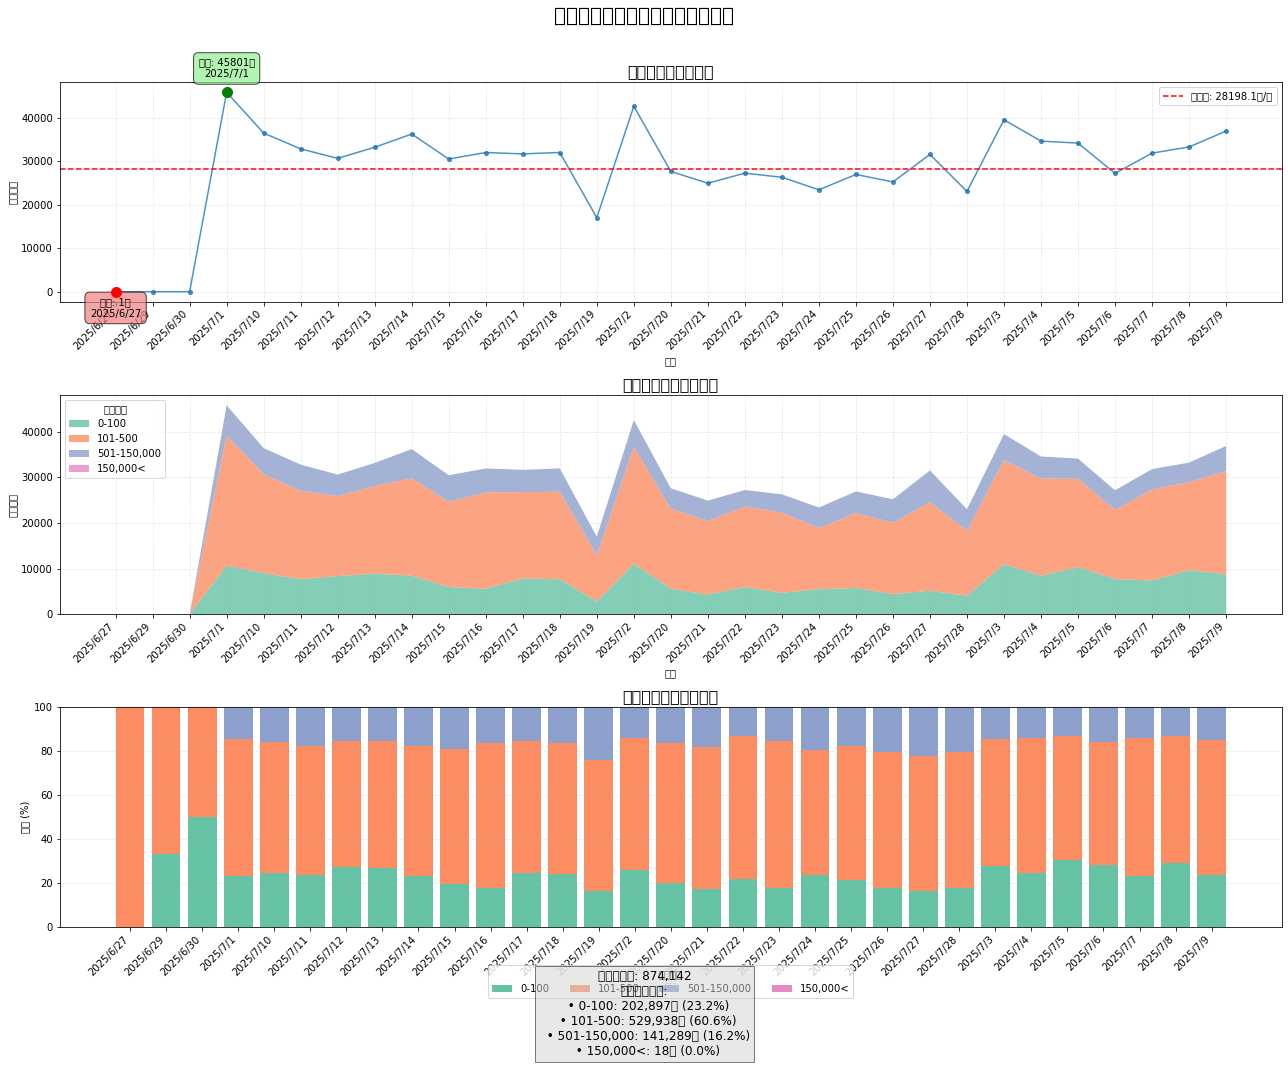

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import time
import numpy as np

# 1. 指定CSV文件路径
file_path = r"D:\chrome_download\1753689672161moore.csv"

# 2. 金额区间定义
amount_bins = [0, 100, 500, 150000, float('inf')]
amount_labels = ['0-100', '101-500', '501-150,000', '150,000<']
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3']  # 区间颜色

# 3. 记录开始时间
start_time = time.time()

try:
    # 4. 读取数据
    print("正在读取文件...")
    df = pd.read_csv(
        file_path, 
        usecols=['trade_date', 'amount'],
        dtype={'amount': float}
    )
    
    # 5. 数据预处理
    print("数据处理中...")
    # 直接使用原始日期字符串
    df['date'] = df['trade_date'].astype(str)
    
    # 创建金额区间列 - 使用pd.cut但避免分类数据类型问题
    df['amount_category'] = pd.cut(
        df['amount'], 
        bins=amount_bins, 
        labels=amount_labels,  # 直接使用字符串标签
        include_lowest=True
    ).astype(str)  # 转换为字符串类型
    
    # 6. 按天统计交易笔数
    daily_total = df.groupby('date').size().reset_index(name='total_count')
    
    # 7. 使用分组统计金额区间分布
    print("统计金额区间分布...")
    
    # 使用pivot_table替代groupby
    pivot_df = df.pivot_table(
        index='date',
        columns='amount_category',
        aggfunc='size',
        fill_value=0
    ).reset_index()
    
    # 确保所有金额区间列都存在
    for label in amount_labels:
        if label not in pivot_df.columns:
            pivot_df[label] = 0
    
    # 8. 合并统计结果
    daily_stats = daily_total.merge(pivot_df, on='date', how='left')
    
    # 9. 按日期排序
    daily_stats = daily_stats.sort_values('date')
    
    # 10. 计算处理时间
    process_time = time.time() - start_time
    print(f"数据处理完成，耗时 {process_time:.2f} 秒")
    print(f"日期范围: {daily_stats['date'].min()} 至 {daily_stats['date'].max()}")
    print(f"总交易笔数: {daily_stats['total_count'].sum():,}")
    
    # 11. 创建可视化图表
    plt.figure(figsize=(18, 15))
    plt.suptitle('每日交易笔数与金额区间分布分析', fontsize=20, fontweight='bold')
    
    # 11.1 总交易笔数变化
    ax1 = plt.subplot(3, 1, 1)
    
    # 使用数值索引绘图
    x = np.arange(len(daily_stats))
    
    plt.plot(x, daily_stats['total_count'], 
             marker='o', markersize=4, linestyle='-', linewidth=1.5, 
             color='#1f77b4', alpha=0.8)
    
    # 标注最高值和最低值
    max_idx = daily_stats['total_count'].idxmax()
    min_idx = daily_stats['total_count'].idxmin()
    
    plt.scatter(x[max_idx], daily_stats.loc[max_idx, 'total_count'], 
                color='green', s=100, zorder=5)
    plt.scatter(x[min_idx], daily_stats.loc[min_idx, 'total_count'], 
                color='red', s=100, zorder=5)
    
    # 添加文本标注
    plt.annotate(f"峰值: {daily_stats.loc[max_idx, 'total_count']}笔\n{daily_stats.loc[max_idx, 'date']}", 
                 (x[max_idx], daily_stats.loc[max_idx, 'total_count']),
                 xytext=(0, 15), textcoords='offset points', ha='center', fontsize=10,
                 bbox=dict(boxstyle='round,pad=0.5', fc='lightgreen', alpha=0.7))
    
    plt.annotate(f"谷值: {daily_stats.loc[min_idx, 'total_count']}笔\n{daily_stats.loc[min_idx, 'date']}", 
                 (x[min_idx], daily_stats.loc[min_idx, 'total_count']),
                 xytext=(0, -25), textcoords='offset points', ha='center', fontsize=10,
                 bbox=dict(boxstyle='round,pad=0.5', fc='lightcoral', alpha=0.7))
    
    # 添加平均线
    mean_value = daily_stats['total_count'].mean()
    plt.axhline(y=mean_value, color='r', linestyle='--', 
                label=f'平均值: {mean_value:.1f}笔/天')
    
    plt.title('每日总交易笔数变化', fontsize=16)
    plt.xlabel('日期')
    plt.ylabel('交易笔数')
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.legend()
    
    # 设置X轴标签为日期
    plt.xticks(x, daily_stats['date'], rotation=45, ha='right')
    
    # 优化显示间隔
    n = len(daily_stats)
    skip = max(1, n // 30)  # 每30个日期显示一个标签
    for i, tick in enumerate(ax1.get_xticklabels()):
        if i % skip != 0:
            tick.set_visible(False)
    
    # 11.2 金额区间分布（堆叠面积图）
    ax2 = plt.subplot(3, 1, 2)
    
    # 准备堆叠数据
    stack_data = daily_stats[amount_labels].copy()
    
    # 绘制堆叠面积图
    y_data = [stack_data[label] for label in amount_labels]
    ax2.stackplot(
        x, 
        *y_data,
        colors=colors, 
        alpha=0.8,
        labels=amount_labels
    )
    
    plt.title('每日交易金额区间分布', fontsize=16)
    plt.xlabel('日期')
    plt.ylabel('交易笔数')
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.legend(title='金额区间', loc='upper left')
    
    # 设置X轴标签为日期
    plt.xticks(x, daily_stats['date'], rotation=45, ha='right')
    
    # 优化显示间隔
    for i, tick in enumerate(ax2.get_xticklabels()):
        if i % skip != 0:
            tick.set_visible(False)
    
    # 11.3 金额区间占比（百分比堆叠柱状图）
    ax3 = plt.subplot(3, 1, 3)
    
    # 计算百分比
    percent_data = stack_data.div(stack_data.sum(axis=1), axis=0) * 100
    
    # 绘制百分比堆叠柱状图
    bottom = np.zeros(len(percent_data))
    for i, label in enumerate(amount_labels):
        ax3.bar(
            x, 
            percent_data[label], 
            bottom=bottom, 
            color=colors[i], 
            width=0.8,
            label=label
        )
        bottom += percent_data[label]
    
    plt.title('每日交易金额区间占比', fontsize=16)
    plt.xlabel('日期')
    plt.ylabel('占比 (%)')
    plt.grid(True, axis='y', linestyle='--', alpha=0.3)
    plt.legend(title='金额区间', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)
    
    # 设置X轴标签为日期
    plt.xticks(x, daily_stats['date'], rotation=45, ha='right')
    
    # 优化显示间隔
    for i, tick in enumerate(ax3.get_xticklabels()):
        if i % skip != 0:
            tick.set_visible(False)
    
    # 12. 添加整体统计信息
    total_counts = df['amount_category'].value_counts()
    total_stats = pd.DataFrame({
        'amount_category': total_counts.index,
        'count': total_counts.values
    })
    total_stats['percentage'] = (total_stats['count'] / total_stats['count'].sum()) * 100
    
    stats_text = "\n".join([
        f"总交易笔数: {total_stats['count'].sum():,}",
        f"金额区间分布:"
    ])
    
    # 确保顺序正确
    for label in amount_labels:
        if label in total_stats['amount_category'].values:
            count = total_stats.loc[total_stats['amount_category'] == label, 'count'].values[0]
            pct = total_stats.loc[total_stats['amount_category'] == label, 'percentage'].values[0]
            stats_text += f"\n  • {label}: {count:,}笔 ({pct:.1f}%)"
        else:
            stats_text += f"\n  • {label}: 0笔 (0.0%)"
    
    plt.figtext(0.5, 0.01, stats_text, ha='center', fontsize=12, 
                bbox=dict(facecolor='lightgrey', alpha=0.5))
    
    # 13. 调整布局并保存
    plt.tight_layout(rect=[0, 0.05, 1, 0.97])  # 为底部文本留空间
    
    # 保存图表
    output_image = file_path.parent / "交易笔数与金额分布分析.png"
    plt.savefig(output_image, dpi=150, bbox_inches='tight')
    print(f"图表已保存到: {output_image}")
    
    # 14. 保存统计结果到CSV
    output_csv = file_path.parent / "每日交易统计.csv"
    
    # 重新排序列
    columns = ['date', 'total_count'] + amount_labels
    daily_stats = daily_stats[columns]
    
    # 重命名列
    daily_stats.columns = ['日期', '总交易笔数'] + amount_labels
    
    daily_stats.to_csv(output_csv, index=False, encoding='utf-8-sig')
    print(f"统计结果已保存到: {output_csv}")
    
    # 15. 显示图表
    plt.show()
    
    # 16. 打印处理时间
    total_time = time.time() - start_time
    print(f"处理完成，总耗时 {total_time:.2f} 秒")

except FileNotFoundError:
    print(f"错误: 找不到文件 {file_path}")
    print("请检查路径是否正确")
except KeyError as e:
    print(f"错误: 未找到列名 {e}")
    print("请确认您的CSV文件中包含正确的日期和金额列名")
    print("提示: 列名区分大小写，请检查实际列名")
except Exception as e:
    print(f"处理过程中出错: {e}")
    import traceback
    traceback.print_exc()

Loading data...
Processing data...
Calculating detailed daily stats...
Creating detailed report...
Detailed report saved to: D:\chrome_download\transaction_report_2025-07-01.csv
Creating visualization...
Chart saved to: D:\chrome_download\transaction_analysis_2025-07-01.png

Processing completed in 33.85 seconds
Processed 874,136 transactions from 2025-07-01 to 2025-07-28


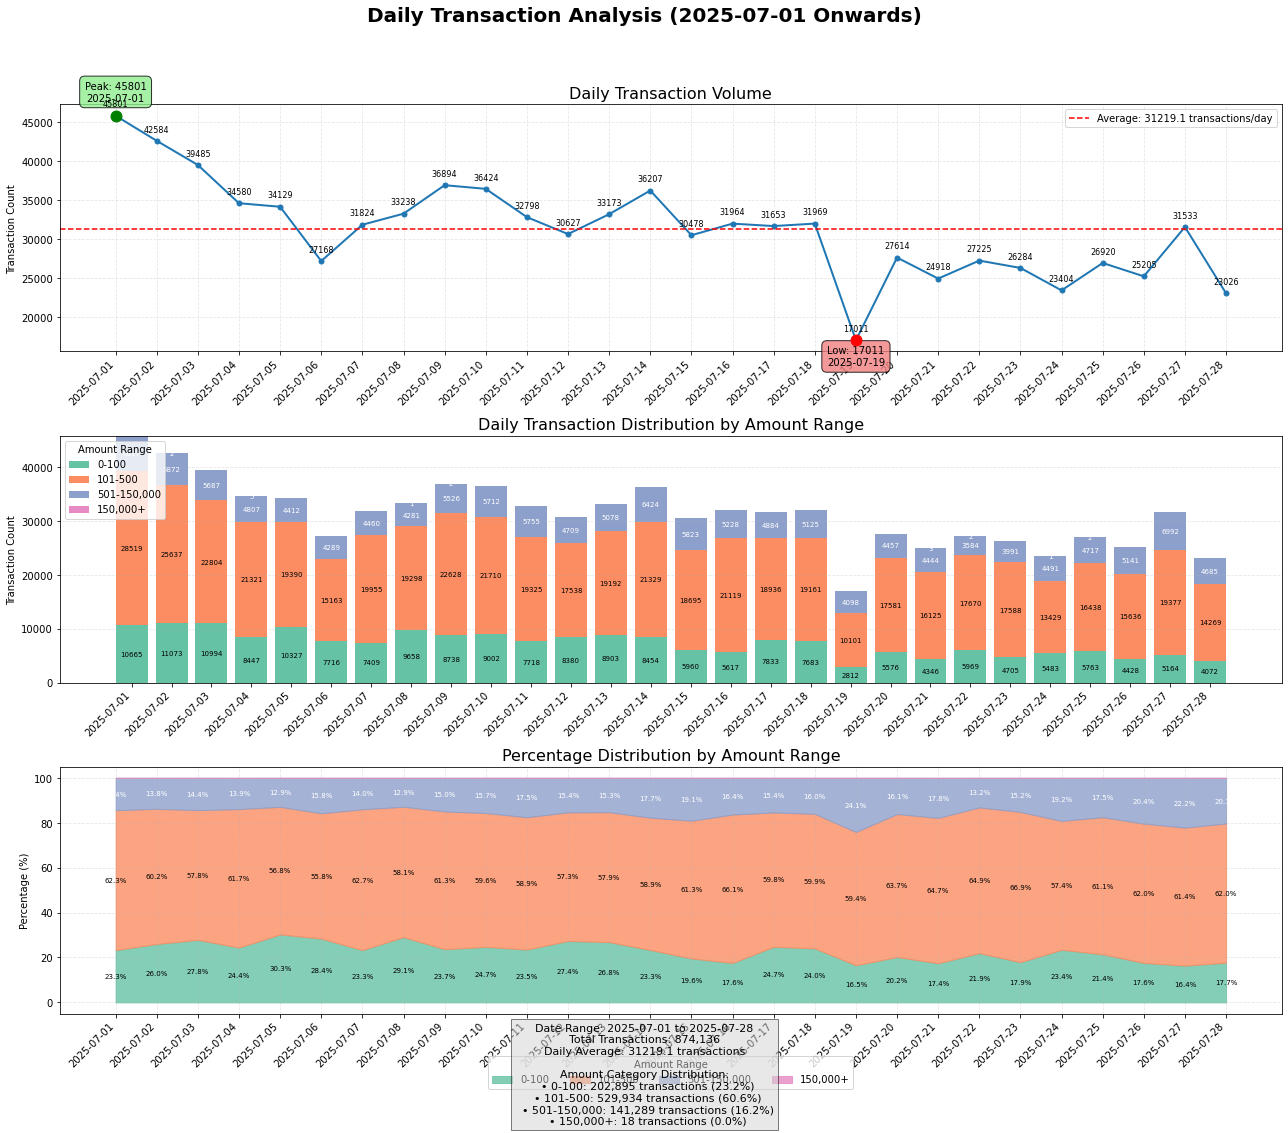

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import time
import os
import sys
from datetime import datetime

# Configuration
DATA_PATH = r"D:\chrome_download\1753689672161moore.csv"  # Update with your path
OUTPUT_DIR = os.path.dirname(DATA_PATH)
START_DATE = '2025-07-01'  # Your specified start date

# Amount categories configuration
AMOUNT_BINS = [0, 100, 500, 150000, float('inf')]
AMOUNT_LABELS = ['0-100', '101-500', '501-150,000', '150,000+']
COLORS = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3']

def main():
    start_time = time.time()
    
    try:
        # 1. Load data
        print("Loading data...")
        df = pd.read_csv(
            DATA_PATH,
            usecols=['trade_date', 'amount'],
            dtype={'amount': float}
        )
        
        # 2. Preprocess data
        print("Processing data...")
        # Convert to datetime and filter
        df['date'] = pd.to_datetime(df['trade_date'])
        df = df[df['date'] >= START_DATE]
        
        if df.empty:
            print(f"No data found after {START_DATE}")
            return
        
        # Convert back to string for consistent handling
        df['date_str'] = df['date'].dt.strftime('%Y-%m-%d')
        
        # Create amount categories
        conditions = [
            df['amount'] <= 100,
            (df['amount'] > 100) & (df['amount'] <= 500),
            (df['amount'] > 500) & (df['amount'] <= 150000),
            df['amount'] > 150000
        ]
        df['amount_category'] = np.select(conditions, AMOUNT_LABELS, default='other')
        
        # 3. Prepare detailed daily statistics
        print("Calculating detailed daily stats...")
        # Total transactions per day
        daily_total = df.groupby('date_str').size().reset_index(name='total_count')
        
        # Transactions by category per day
        category_counts = pd.crosstab(df['date_str'], df['amount_category'])
        
        # Ensure all categories are present
        for label in AMOUNT_LABELS:
            if label not in category_counts.columns:
                category_counts[label] = 0
        
        # Merge results
        daily_stats = daily_total.merge(category_counts[AMOUNT_LABELS], 
                                       left_on='date_str', 
                                       right_index=True,
                                       how='left')
        
        # Fill any missing values
        daily_stats.fillna(0, inplace=True)
        daily_stats.sort_values('date_str', inplace=True)
        
        # Calculate percentages for each category
        for label in AMOUNT_LABELS:
            daily_stats[f'pct_{label}'] = (daily_stats[label] / daily_stats['total_count']) * 100
        
        # 4. Create detailed report CSV
        print("Creating detailed report...")
        detailed_report = pd.DataFrame()
        detailed_report['Date'] = daily_stats['date_str']
        detailed_report['Total Transactions'] = daily_stats['total_count']
        
        # Add count and percentage for each category
        detailed_report['0-100 Count'] = daily_stats['0-100']
        detailed_report['0-100 Percentage'] = daily_stats['pct_0-100'].round(2)
        
        detailed_report['101-500 Count'] = daily_stats['101-500']
        detailed_report['101-500 Percentage'] = daily_stats['pct_101-500'].round(2)
        
        detailed_report['501-150,000 Count'] = daily_stats['501-150,000']
        detailed_report['501-150,000 Percentage'] = daily_stats['pct_501-150,000'].round(2)
        
        detailed_report['>150,000 Count'] = daily_stats['150,000+']
        detailed_report['>150,000 Percentage'] = daily_stats['pct_150,000+'].round(2)
        
        # Save CSV report
        csv_path = os.path.join(OUTPUT_DIR, f"transaction_report_{START_DATE}.csv")
        detailed_report.to_csv(csv_path, index=False, encoding='utf-8-sig')
        print(f"Detailed report saved to: {csv_path}")
        
        # 5. Create visualization with English labels
        print("Creating visualization...")
        plt.figure(figsize=(18, 16))
        plt.suptitle(f'Daily Transaction Analysis ({START_DATE} Onwards)', 
                    fontsize=20, 
                    fontweight='bold')
        
        # Prepare x-axis positions
        dates = daily_stats['date_str'].tolist()
        x = np.arange(len(dates))
        
        # 5.1 Total Transactions Plot
        ax1 = plt.subplot(3, 1, 1)
        plt.plot(x, daily_stats['total_count'], 
                 marker='o', markersize=5, linestyle='-', linewidth=2, 
                 color='#1f77b4')
        
        # Find min/max values
        max_idx = daily_stats['total_count'].idxmax()
        min_idx = daily_stats['total_count'].idxmin()
        
        # Highlight min/max
        plt.scatter(x[max_idx], daily_stats.loc[max_idx, 'total_count'], 
                    color='green', s=120, zorder=5)
        plt.scatter(x[min_idx], daily_stats.loc[min_idx, 'total_count'], 
                    color='red', s=120, zorder=5)
        
        # Add annotations
        plt.annotate(f"Peak: {daily_stats.loc[max_idx, 'total_count']}\n{dates[max_idx]}", 
                    (x[max_idx], daily_stats.loc[max_idx, 'total_count']),
                    xytext=(0, 15), textcoords='offset points', 
                    ha='center', fontsize=10,
                    bbox=dict(boxstyle='round,pad=0.5', fc='lightgreen', alpha=0.8))
        
        plt.annotate(f"Low: {daily_stats.loc[min_idx, 'total_count']}\n{dates[min_idx]}", 
                    (x[min_idx], daily_stats.loc[min_idx, 'total_count']),
                    xytext=(0, -25), textcoords='offset points', 
                    ha='center', fontsize=10,
                    bbox=dict(boxstyle='round,pad=0.5', fc='lightcoral', alpha=0.8))
        
        # Add daily counts on points
        for i, count in enumerate(daily_stats['total_count']):
            plt.text(x[i], count + max(daily_stats['total_count']) * 0.02, 
                     f"{int(count)}", 
                     ha='center', va='bottom', fontsize=8)
        
        # Add average line
        avg_count = daily_stats['total_count'].mean()
        plt.axhline(y=avg_count, color='r', linestyle='--', 
                   label=f'Average: {avg_count:.1f} transactions/day')
        
        plt.title('Daily Transaction Volume', fontsize=16)
        plt.ylabel('Transaction Count')
        plt.grid(True, linestyle='--', alpha=0.3)
        plt.legend()
        
        # Set x-axis labels with optimized spacing
        plt.xticks(x, dates, rotation=45, ha='right')
        n = len(dates)
        skip = max(1, n // 30)  # Show every nth label
        for i, label in enumerate(ax1.get_xticklabels()):
            if i % skip != 0:
                label.set_visible(False)
        
        # 5.2 Transaction Distribution by Amount (Stacked Bar Chart)
        ax2 = plt.subplot(3, 1, 2)
        stack_data = daily_stats[AMOUNT_LABELS]
        
        # Create stacked bar chart
        bottom = np.zeros(len(stack_data))
        for i, label in enumerate(AMOUNT_LABELS):
            ax2.bar(
                x, 
                stack_data[label], 
                bottom=bottom, 
                color=COLORS[i], 
                width=0.8,
                label=label
            )
            
            # Add count labels for each segment
            for j, val in enumerate(stack_data[label]):
                if val > 0:  # Only add label if value is non-zero
                    ax2.text(
                        x[j], 
                        bottom[j] + val/2, 
                        f"{int(val)}", 
                        ha='center', 
                        va='center',
                        fontsize=7,
                        color='white' if i in [2, 3] else 'black'
                    )
            
            bottom += stack_data[label]
        
        plt.title('Daily Transaction Distribution by Amount Range', fontsize=16)
        plt.ylabel('Transaction Count')
        plt.grid(True, linestyle='--', alpha=0.3, axis='y')
        plt.legend(title='Amount Range', loc='upper left')
        
        # Set x-axis labels
        plt.xticks(x, dates, rotation=45, ha='right')
        for i, label in enumerate(ax2.get_xticklabels()):
            if i % skip != 0:
                label.set_visible(False)
        
        # 5.3 Percentage Distribution (Stacked Area Chart)
        ax3 = plt.subplot(3, 1, 3)
        percent_data = stack_data.div(stack_data.sum(axis=1), axis=0) * 100
        
        # Create stacked area chart
        bottom = np.zeros(len(percent_data))
        for i, label in enumerate(AMOUNT_LABELS):
            ax3.fill_between(
                x, 
                bottom, 
                bottom + percent_data[label],
                color=COLORS[i],
                alpha=0.8,
                label=label
            )
            
            # Add percentage labels at midpoints
            midpoints = bottom + percent_data[label]/2
            for j, val in enumerate(percent_data[label]):
                if val > 5:  # Only show label if percentage > 5%
                    ax3.text(
                        x[j], 
                        midpoints[j], 
                        f"{val:.1f}%", 
                        ha='center', 
                        va='center',
                        fontsize=7,
                        color='white' if i in [2, 3] else 'black'
                    )
            
            bottom += percent_data[label]
        
        plt.title('Percentage Distribution by Amount Range', fontsize=16)
        plt.ylabel('Percentage (%)')
        plt.grid(True, linestyle='--', alpha=0.3)
        plt.legend(title='Amount Range', loc='upper center', 
                  bbox_to_anchor=(0.5, -0.15), ncol=4)
        
        # Set x-axis labels
        plt.xticks(x, dates, rotation=45, ha='right')
        for i, label in enumerate(ax3.get_xticklabels()):
            if i % skip != 0:
                label.set_visible(False)
        
        # 6. Add summary statistics
        total_transactions = daily_stats['total_count'].sum()
        category_totals = stack_data.sum()
        category_percent = (category_totals / total_transactions) * 100
        
        stats_text = [
            f"Date Range: {min(dates)} to {max(dates)}",
            f"Total Transactions: {total_transactions:,}",
            f"Daily Average: {avg_count:.1f} transactions",
            "",
            "Amount Category Distribution:"
        ]
        
        for i, label in enumerate(AMOUNT_LABELS):
            stats_text.append(
                f"  • {label}: {category_totals.iloc[i]:,} transactions "
                f"({category_percent.iloc[i]:.1f}%)"
            )
        
        plt.figtext(0.5, 0.01, "\n".join(stats_text), 
                    ha='center', fontsize=11, 
                    bbox=dict(facecolor='lightgrey', alpha=0.5))
        
        # 7. Save visualization
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        
        output_image = os.path.join(OUTPUT_DIR, f"transaction_analysis_{START_DATE}.png")
        plt.savefig(output_image, dpi=150, bbox_inches='tight')
        print(f"Chart saved to: {output_image}")
        
        # 8. Performance metrics
        process_time = time.time() - start_time
        print(f"\nProcessing completed in {process_time:.2f} seconds")
        print(f"Processed {len(df):,} transactions from {min(dates)} to {max(dates)}")
        
        plt.show()
        
    except Exception as e:
        print(f"Error: {str(e)}")
        import traceback
        traceback.print_exc()
        sys.exit(1)
if __name__ == "__main__":
    main()

Loading data...
Processing data...
Calculating detailed daily stats...
Creating detailed report...
Detailed report saved to: D:\chrome_download\transaction_report_2025-06-25.csv
Creating visualization...
Chart saved to: D:\chrome_download\transaction_analysis_2025-06-25.png

Processing completed in 11.10 seconds
Processed 260,421 transactions from 2025-06-25 to 2025-06-29


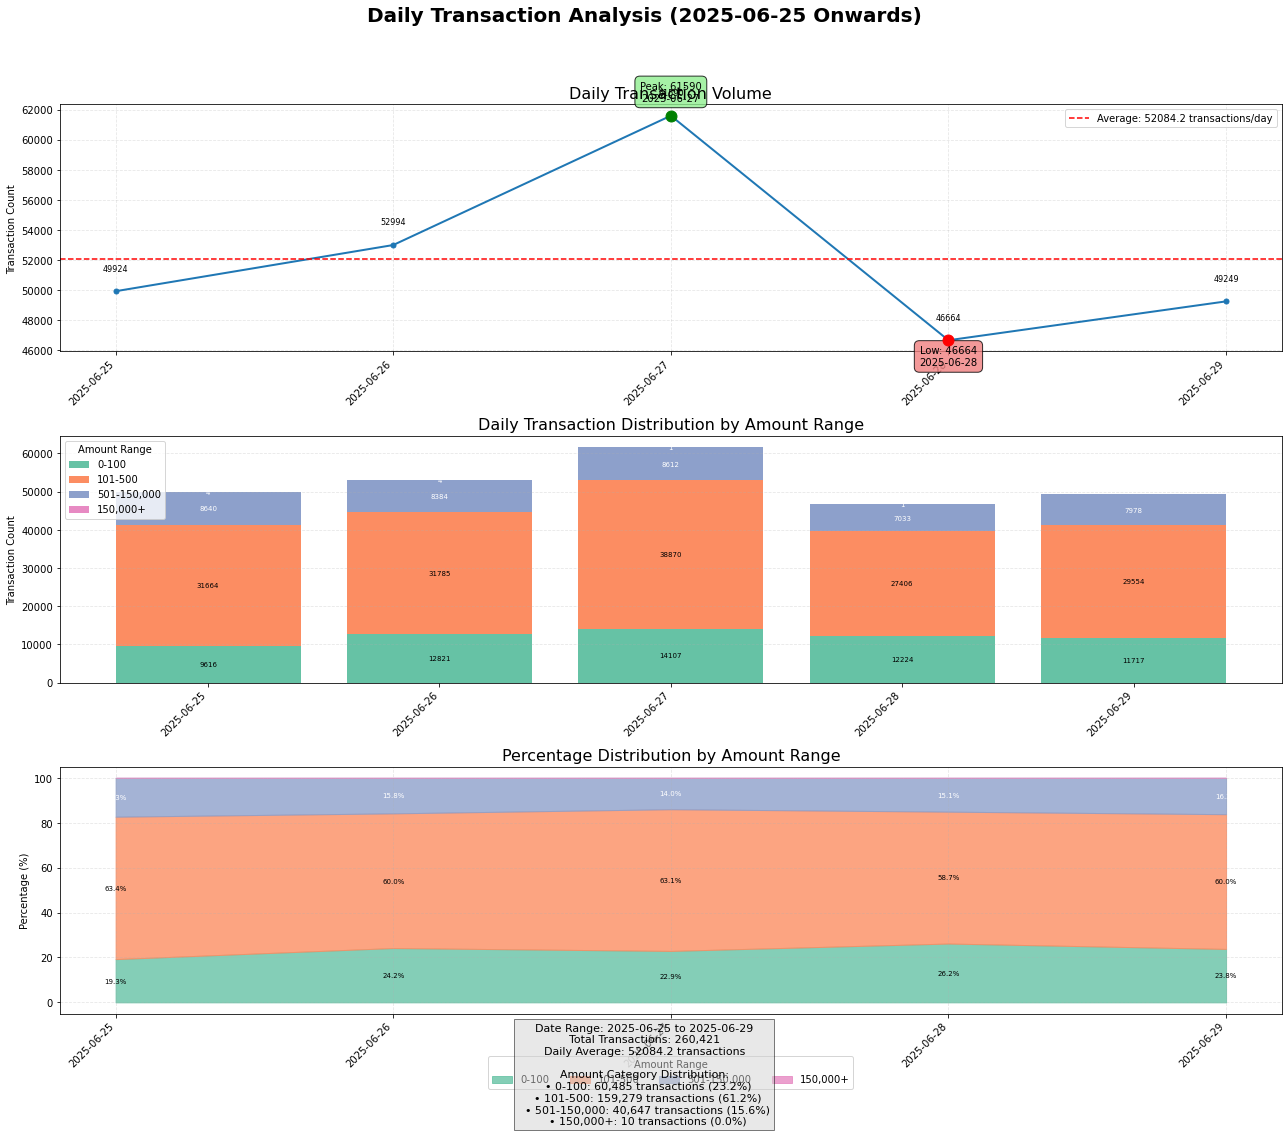

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import time
import os
import sys
from datetime import datetime

# Configuration
DATA_PATH = r"D:\chrome_download\1753695299475moore.csv"  # Update with your path
OUTPUT_DIR = os.path.dirname(DATA_PATH)
START_DATE = '2025-06-25'  # Your specified start date

# Amount categories configuration
AMOUNT_BINS = [0, 100, 500, 150000, float('inf')]
AMOUNT_LABELS = ['0-100', '101-500', '501-150,000', '150,000+']
COLORS = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3']

def main():
    start_time = time.time()
    
    try:
        # 1. Load data
        print("Loading data...")
        df = pd.read_csv(
            DATA_PATH,
            usecols=['trade_date', 'amount'],
            dtype={'amount': float}
        )
        
        # 2. Preprocess data
        print("Processing data...")
        # Convert to datetime and filter
        df['date'] = pd.to_datetime(df['trade_date'])
        df = df[df['date'] >= START_DATE]
        
        if df.empty:
            print(f"No data found after {START_DATE}")
            return
        
        # Convert back to string for consistent handling
        df['date_str'] = df['date'].dt.strftime('%Y-%m-%d')
        
        # Create amount categories
        conditions = [
            df['amount'] <= 100,
            (df['amount'] > 100) & (df['amount'] <= 500),
            (df['amount'] > 500) & (df['amount'] <= 150000),
            df['amount'] > 150000
        ]
        df['amount_category'] = np.select(conditions, AMOUNT_LABELS, default='other')
        
        # 3. Prepare detailed daily statistics
        print("Calculating detailed daily stats...")
        # Total transactions per day
        daily_total = df.groupby('date_str').size().reset_index(name='total_count')
        
        # Transactions by category per day
        category_counts = pd.crosstab(df['date_str'], df['amount_category'])
        
        # Ensure all categories are present
        for label in AMOUNT_LABELS:
            if label not in category_counts.columns:
                category_counts[label] = 0
        
        # Merge results
        daily_stats = daily_total.merge(category_counts[AMOUNT_LABELS], 
                                       left_on='date_str', 
                                       right_index=True,
                                       how='left')
        
        # Fill any missing values
        daily_stats.fillna(0, inplace=True)
        daily_stats.sort_values('date_str', inplace=True)
        
        # Calculate percentages for each category
        for label in AMOUNT_LABELS:
            daily_stats[f'pct_{label}'] = (daily_stats[label] / daily_stats['total_count']) * 100
        
        # 4. Create detailed report CSV
        print("Creating detailed report...")
        detailed_report = pd.DataFrame()
        detailed_report['Date'] = daily_stats['date_str']
        detailed_report['Total Transactions'] = daily_stats['total_count']
        
        # Add count and percentage for each category
        detailed_report['0-100 Count'] = daily_stats['0-100']
        detailed_report['0-100 Percentage'] = daily_stats['pct_0-100'].round(2)
        
        detailed_report['101-500 Count'] = daily_stats['101-500']
        detailed_report['101-500 Percentage'] = daily_stats['pct_101-500'].round(2)
        
        detailed_report['501-150,000 Count'] = daily_stats['501-150,000']
        detailed_report['501-150,000 Percentage'] = daily_stats['pct_501-150,000'].round(2)
        
        detailed_report['>150,000 Count'] = daily_stats['150,000+']
        detailed_report['>150,000 Percentage'] = daily_stats['pct_150,000+'].round(2)
        
        # Save CSV report
        csv_path = os.path.join(OUTPUT_DIR, f"transaction_report_{START_DATE}.csv")
        detailed_report.to_csv(csv_path, index=False, encoding='utf-8-sig')
        print(f"Detailed report saved to: {csv_path}")
        
        # 5. Create visualization with English labels
        print("Creating visualization...")
        plt.figure(figsize=(18, 16))
        plt.suptitle(f'Daily Transaction Analysis ({START_DATE} Onwards)', 
                    fontsize=20, 
                    fontweight='bold')
        
        # Prepare x-axis positions
        dates = daily_stats['date_str'].tolist()
        x = np.arange(len(dates))
        
        # 5.1 Total Transactions Plot
        ax1 = plt.subplot(3, 1, 1)
        plt.plot(x, daily_stats['total_count'], 
                 marker='o', markersize=5, linestyle='-', linewidth=2, 
                 color='#1f77b4')
        
        # Find min/max values
        max_idx = daily_stats['total_count'].idxmax()
        min_idx = daily_stats['total_count'].idxmin()
        
        # Highlight min/max
        plt.scatter(x[max_idx], daily_stats.loc[max_idx, 'total_count'], 
                    color='green', s=120, zorder=5)
        plt.scatter(x[min_idx], daily_stats.loc[min_idx, 'total_count'], 
                    color='red', s=120, zorder=5)
        
        # Add annotations
        plt.annotate(f"Peak: {daily_stats.loc[max_idx, 'total_count']}\n{dates[max_idx]}", 
                    (x[max_idx], daily_stats.loc[max_idx, 'total_count']),
                    xytext=(0, 15), textcoords='offset points', 
                    ha='center', fontsize=10,
                    bbox=dict(boxstyle='round,pad=0.5', fc='lightgreen', alpha=0.8))
        
        plt.annotate(f"Low: {daily_stats.loc[min_idx, 'total_count']}\n{dates[min_idx]}", 
                    (x[min_idx], daily_stats.loc[min_idx, 'total_count']),
                    xytext=(0, -25), textcoords='offset points', 
                    ha='center', fontsize=10,
                    bbox=dict(boxstyle='round,pad=0.5', fc='lightcoral', alpha=0.8))
        
        # Add daily counts on points
        for i, count in enumerate(daily_stats['total_count']):
            plt.text(x[i], count + max(daily_stats['total_count']) * 0.02, 
                     f"{int(count)}", 
                     ha='center', va='bottom', fontsize=8)
        
        # Add average line
        avg_count = daily_stats['total_count'].mean()
        plt.axhline(y=avg_count, color='r', linestyle='--', 
                   label=f'Average: {avg_count:.1f} transactions/day')
        
        plt.title('Daily Transaction Volume', fontsize=16)
        plt.ylabel('Transaction Count')
        plt.grid(True, linestyle='--', alpha=0.3)
        plt.legend()
        
        # Set x-axis labels with optimized spacing
        plt.xticks(x, dates, rotation=45, ha='right')
        n = len(dates)
        skip = max(1, n // 30)  # Show every nth label
        for i, label in enumerate(ax1.get_xticklabels()):
            if i % skip != 0:
                label.set_visible(False)
        
        # 5.2 Transaction Distribution by Amount (Stacked Bar Chart)
        ax2 = plt.subplot(3, 1, 2)
        stack_data = daily_stats[AMOUNT_LABELS]
        
        # Create stacked bar chart
        bottom = np.zeros(len(stack_data))
        for i, label in enumerate(AMOUNT_LABELS):
            ax2.bar(
                x, 
                stack_data[label], 
                bottom=bottom, 
                color=COLORS[i], 
                width=0.8,
                label=label
            )
            
            # Add count labels for each segment
            for j, val in enumerate(stack_data[label]):
                if val > 0:  # Only add label if value is non-zero
                    ax2.text(
                        x[j], 
                        bottom[j] + val/2, 
                        f"{int(val)}", 
                        ha='center', 
                        va='center',
                        fontsize=7,
                        color='white' if i in [2, 3] else 'black'
                    )
            
            bottom += stack_data[label]
        
        plt.title('Daily Transaction Distribution by Amount Range', fontsize=16)
        plt.ylabel('Transaction Count')
        plt.grid(True, linestyle='--', alpha=0.3, axis='y')
        plt.legend(title='Amount Range', loc='upper left')
        
        # Set x-axis labels
        plt.xticks(x, dates, rotation=45, ha='right')
        for i, label in enumerate(ax2.get_xticklabels()):
            if i % skip != 0:
                label.set_visible(False)
        
        # 5.3 Percentage Distribution (Stacked Area Chart)
        ax3 = plt.subplot(3, 1, 3)
        percent_data = stack_data.div(stack_data.sum(axis=1), axis=0) * 100
        
        # Create stacked area chart
        bottom = np.zeros(len(percent_data))
        for i, label in enumerate(AMOUNT_LABELS):
            ax3.fill_between(
                x, 
                bottom, 
                bottom + percent_data[label],
                color=COLORS[i],
                alpha=0.8,
                label=label
            )
            
            # Add percentage labels at midpoints
            midpoints = bottom + percent_data[label]/2
            for j, val in enumerate(percent_data[label]):
                if val > 5:  # Only show label if percentage > 5%
                    ax3.text(
                        x[j], 
                        midpoints[j], 
                        f"{val:.1f}%", 
                        ha='center', 
                        va='center',
                        fontsize=7,
                        color='white' if i in [2, 3] else 'black'
                    )
            
            bottom += percent_data[label]
        
        plt.title('Percentage Distribution by Amount Range', fontsize=16)
        plt.ylabel('Percentage (%)')
        plt.grid(True, linestyle='--', alpha=0.3)
        plt.legend(title='Amount Range', loc='upper center', 
                  bbox_to_anchor=(0.5, -0.15), ncol=4)
        
        # Set x-axis labels
        plt.xticks(x, dates, rotation=45, ha='right')
        for i, label in enumerate(ax3.get_xticklabels()):
            if i % skip != 0:
                label.set_visible(False)
        
        # 6. Add summary statistics
        total_transactions = daily_stats['total_count'].sum()
        category_totals = stack_data.sum()
        category_percent = (category_totals / total_transactions) * 100
        
        stats_text = [
            f"Date Range: {min(dates)} to {max(dates)}",
            f"Total Transactions: {total_transactions:,}",
            f"Daily Average: {avg_count:.1f} transactions",
            "",
            "Amount Category Distribution:"
        ]
        
        for i, label in enumerate(AMOUNT_LABELS):
            stats_text.append(
                f"  • {label}: {category_totals.iloc[i]:,} transactions "
                f"({category_percent.iloc[i]:.1f}%)"
            )
        
        plt.figtext(0.5, 0.01, "\n".join(stats_text), 
                    ha='center', fontsize=11, 
                    bbox=dict(facecolor='lightgrey', alpha=0.5))
        
        # 7. Save visualization
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        
        output_image = os.path.join(OUTPUT_DIR, f"transaction_analysis_{START_DATE}.png")
        plt.savefig(output_image, dpi=150, bbox_inches='tight')
        print(f"Chart saved to: {output_image}")
        
        # 8. Performance metrics
        process_time = time.time() - start_time
        print(f"\nProcessing completed in {process_time:.2f} seconds")
        print(f"Processed {len(df):,} transactions from {min(dates)} to {max(dates)}")
        
        plt.show()
        
    except Exception as e:
        print(f"Error: {str(e)}")
        import traceback
        traceback.print_exc()
        sys.exit(1)
if __name__ == "__main__":
    main()

Loading data...
Processing data...
Calculating detailed daily stats...
Creating detailed report...
Detailed report saved to: D:\chrome_download\transaction_report_2025-06-25.csv
Creating visualization...
Chart saved to: D:\chrome_download\transaction_analysis_2025-06-25.png

Processing completed in 9.55 seconds
Processed 260,421 transactions from 2025-06-25 to 2025-06-29


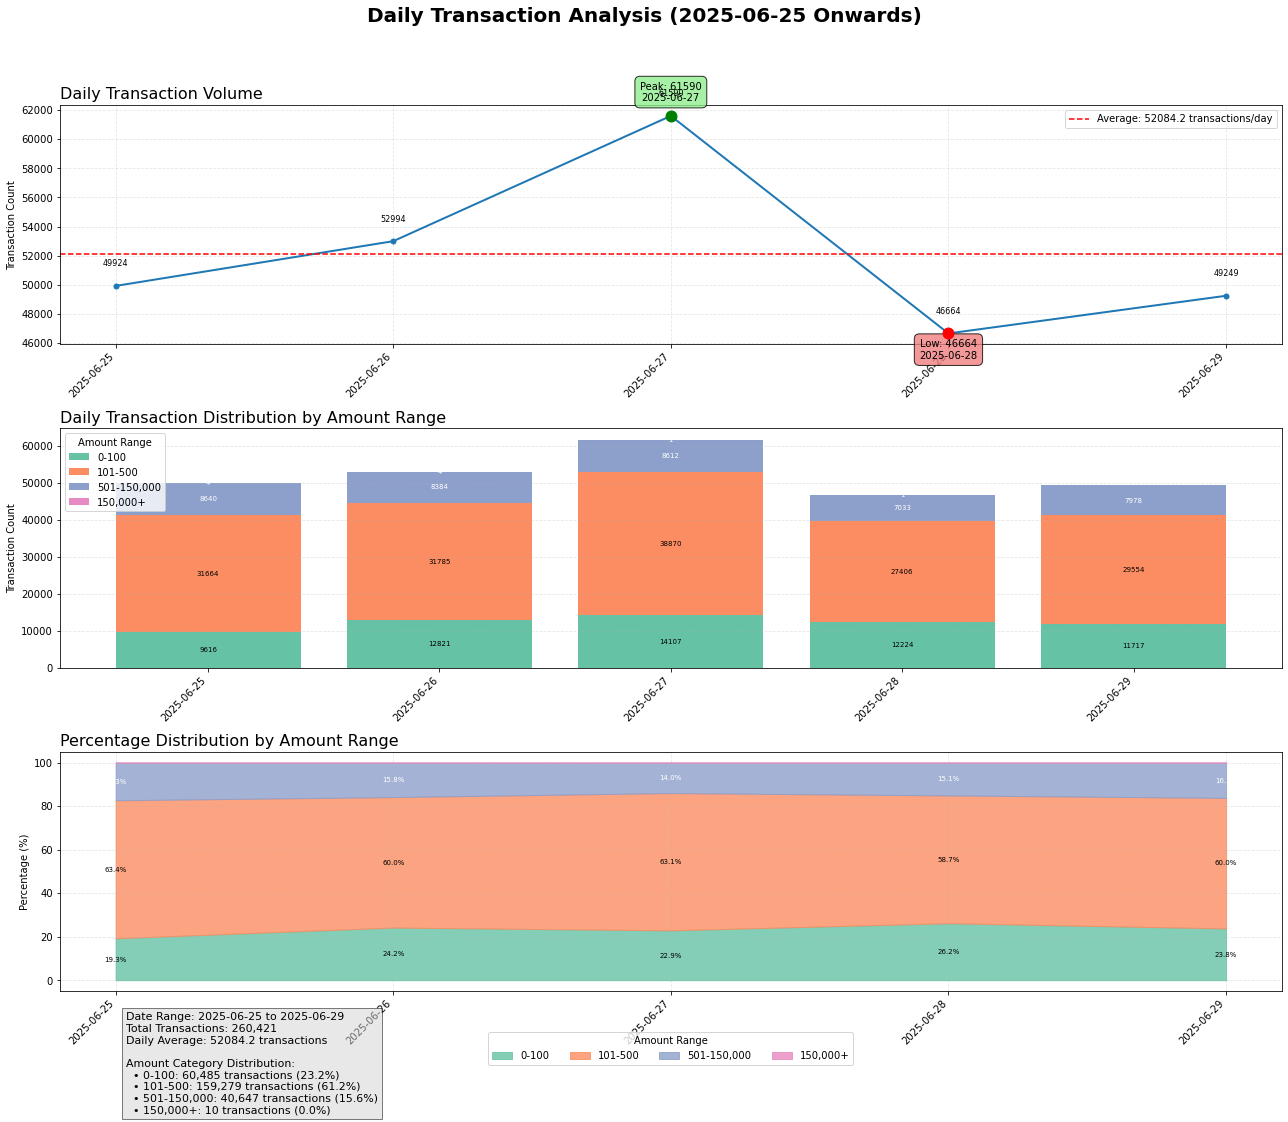

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import time
import os
import sys
from datetime import datetime

# Configuration
DATA_PATH = r"D:\chrome_download\1753695299475moore.csv"  # Update with your path
OUTPUT_DIR = os.path.dirname(DATA_PATH)
START_DATE = '2025-06-25'  # Your specified start date

# Amount categories configuration
AMOUNT_BINS = [0, 100, 500, 150000, float('inf')]
AMOUNT_LABELS = ['0-100', '101-500', '501-150,000', '150,000+']
COLORS = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3']

def main():
    start_time = time.time()
    
    try:
        # 1. Load data
        print("Loading data...")
        df = pd.read_csv(
            DATA_PATH,
            usecols=['trade_date', 'amount'],
            dtype={'amount': float}
        )
        
        # 2. Preprocess data
        print("Processing data...")
        # Convert to datetime and filter
        df['date'] = pd.to_datetime(df['trade_date'])
        df = df[df['date'] >= START_DATE]
        
        if df.empty:
            print(f"No data found after {START_DATE}")
            return
        
        # Convert back to string for consistent handling
        df['date_str'] = df['date'].dt.strftime('%Y-%m-%d')
        
        # Create amount categories
        conditions = [
            df['amount'] <= 100,
            (df['amount'] > 100) & (df['amount'] <= 500),
            (df['amount'] > 500) & (df['amount'] <= 150000),
            df['amount'] > 150000
        ]
        df['amount_category'] = np.select(conditions, AMOUNT_LABELS, default='other')
        
        # 3. Prepare detailed daily statistics
        print("Calculating detailed daily stats...")
        # Total transactions per day
        daily_total = df.groupby('date_str').size().reset_index(name='total_count')
        
        # Transactions by category per day
        category_counts = pd.crosstab(df['date_str'], df['amount_category'])
        
        # Ensure all categories are present
        for label in AMOUNT_LABELS:
            if label not in category_counts.columns:
                category_counts[label] = 0
        
        # Merge results
        daily_stats = daily_total.merge(category_counts[AMOUNT_LABELS], 
                                       left_on='date_str', 
                                       right_index=True,
                                       how='left')
        
        # Fill any missing values
        daily_stats.fillna(0, inplace=True)
        daily_stats.sort_values('date_str', inplace=True)
        
        # Calculate percentages for each category
        for label in AMOUNT_LABELS:
            daily_stats[f'pct_{label}'] = (daily_stats[label] / daily_stats['total_count']) * 100
        
        # 4. Create detailed report CSV
        print("Creating detailed report...")
        detailed_report = pd.DataFrame()
        detailed_report['Date'] = daily_stats['date_str']
        detailed_report['Total Transactions'] = daily_stats['total_count']
        
        # Add count and percentage for each category
        detailed_report['0-100 Count'] = daily_stats['0-100']
        detailed_report['0-100 Percentage'] = daily_stats['pct_0-100'].round(2)
        
        detailed_report['101-500 Count'] = daily_stats['101-500']
        detailed_report['101-500 Percentage'] = daily_stats['pct_101-500'].round(2)
        
        detailed_report['501-150,000 Count'] = daily_stats['501-150,000']
        detailed_report['501-150,000 Percentage'] = daily_stats['pct_501-150,000'].round(2)
        
        detailed_report['>150,000 Count'] = daily_stats['150,000+']
        detailed_report['>150,000 Percentage'] = daily_stats['pct_150,000+'].round(2)
        
        # Save CSV report
        csv_path = os.path.join(OUTPUT_DIR, f"transaction_report_{START_DATE}.csv")
        detailed_report.to_csv(csv_path, index=False, encoding='utf-8-sig')
        print(f"Detailed report saved to: {csv_path}")
        
        # 5. Create visualization with English labels
        print("Creating visualization...")
        plt.figure(figsize=(18, 16))
        plt.suptitle(f'Daily Transaction Analysis ({START_DATE} Onwards)', 
                    fontsize=20, 
                    fontweight='bold')
        
        # Prepare x-axis positions
        dates = daily_stats['date_str'].tolist()
        x = np.arange(len(dates))
        
        # 5.1 Total Transactions Plot
        ax1 = plt.subplot(3, 1, 1)
        plt.plot(x, daily_stats['total_count'], 
                 marker='o', markersize=5, linestyle='-', linewidth=2, 
                 color='#1f77b4')
        
        # Find min/max values
        max_idx = daily_stats['total_count'].idxmax()
        min_idx = daily_stats['total_count'].idxmin()
        
        # Highlight min/max
        plt.scatter(x[max_idx], daily_stats.loc[max_idx, 'total_count'], 
                    color='green', s=120, zorder=5)
        plt.scatter(x[min_idx], daily_stats.loc[min_idx, 'total_count'], 
                    color='red', s=120, zorder=5)
        
        # Add annotations
        plt.annotate(f"Peak: {daily_stats.loc[max_idx, 'total_count']}\n{dates[max_idx]}", 
                    (x[max_idx], daily_stats.loc[max_idx, 'total_count']),
                    xytext=(0, 15), textcoords='offset points', 
                    ha='center', fontsize=10,
                    bbox=dict(boxstyle='round,pad=0.5', fc='lightgreen', alpha=0.8))
        
        plt.annotate(f"Low: {daily_stats.loc[min_idx, 'total_count']}\n{dates[min_idx]}", 
                    (x[min_idx], daily_stats.loc[min_idx, 'total_count']),
                    xytext=(0, -25), textcoords='offset points', 
                    ha='center', fontsize=10,
                    bbox=dict(boxstyle='round,pad=0.5', fc='lightcoral', alpha=0.8))
        
        # Add daily counts on points
        for i, count in enumerate(daily_stats['total_count']):
            plt.text(x[i], count + max(daily_stats['total_count']) * 0.02, 
                     f"{int(count)}", 
                     ha='center', va='bottom', fontsize=8)
        
        # Add average line
        avg_count = daily_stats['total_count'].mean()
        plt.axhline(y=avg_count, color='r', linestyle='--', 
                   label=f'Average: {avg_count:.1f} transactions/day')
        
        plt.title('Daily Transaction Volume',loc='left' , fontsize=16)
        plt.ylabel('Transaction Count')
        plt.grid(True, linestyle='--', alpha=0.3)
        plt.legend()
        
        # Set x-axis labels with optimized spacing
        plt.xticks(x, dates, rotation=45, ha='right')
        n = len(dates)
        skip = max(1, n // 30)  # Show every nth label
        for i, label in enumerate(ax1.get_xticklabels()):
            if i % skip != 0:
                label.set_visible(False)
        
        # 5.2 Transaction Distribution by Amount (Stacked Bar Chart)
        ax2 = plt.subplot(3, 1, 2)
        stack_data = daily_stats[AMOUNT_LABELS]
        
        # Create stacked bar chart
        bottom = np.zeros(len(stack_data))
        for i, label in enumerate(AMOUNT_LABELS):
            ax2.bar(
                x, 
                stack_data[label], 
                bottom=bottom, 
                color=COLORS[i], 
                width=0.8,
                label=label
            )
            
            # Add count labels for each segment
            for j, val in enumerate(stack_data[label]):
                if val > 0:  # Only add label if value is non-zero
                    ax2.text(
                        x[j], 
                        bottom[j] + val/2, 
                        f"{int(val)}", 
                        ha='center', 
                        va='center',
                        fontsize=7,
                        color='white' if i in [2, 3] else 'black'
                    )
            
            bottom += stack_data[label]
        
        plt.title('Daily Transaction Distribution by Amount Range', loc='left' , fontsize=16)
        plt.ylabel('Transaction Count')
        plt.grid(True, linestyle='--', alpha=0.3, axis='y')
        plt.legend(title='Amount Range', loc='upper left')
        
        # Set x-axis labels
        plt.xticks(x, dates, rotation=45, ha='right')
        for i, label in enumerate(ax2.get_xticklabels()):
            if i % skip != 0:
                label.set_visible(False)
        
        # 5.3 Percentage Distribution (Stacked Area Chart)
        ax3 = plt.subplot(3, 1, 3)
        percent_data = stack_data.div(stack_data.sum(axis=1), axis=0) * 100
        
        # Create stacked area chart
        bottom = np.zeros(len(percent_data))
        for i, label in enumerate(AMOUNT_LABELS):
            ax3.fill_between(
                x, 
                bottom, 
                bottom + percent_data[label],
                color=COLORS[i],
                alpha=0.8,
                label=label
            )
            
            # Add percentage labels at midpoints
            midpoints = bottom + percent_data[label]/2
            for j, val in enumerate(percent_data[label]):
                if val > 5:  # Only show label if percentage > 5%
                    ax3.text(
                        x[j], 
                        midpoints[j], 
                        f"{val:.1f}%", 
                        ha='center', 
                        va='center',
                        fontsize=7,
                        color='white' if i in [2, 3] else 'black'
                    )
            
            bottom += percent_data[label]
        
        plt.title('Percentage Distribution by Amount Range',loc='left' , fontsize=16)
        plt.ylabel('Percentage (%)')
        plt.grid(True, linestyle='--', alpha=0.3)
        plt.legend(title='Amount Range', loc='upper center', 
                  bbox_to_anchor=(0.5, -0.15), ncol=4)
        
        # Set x-axis labels
        plt.xticks(x, dates, rotation=45, ha='right')
        for i, label in enumerate(ax3.get_xticklabels()):
            if i % skip != 0:
                label.set_visible(False)
        
        # 6. Add summary statistics
        total_transactions = daily_stats['total_count'].sum()
        category_totals = stack_data.sum()
        category_percent = (category_totals / total_transactions) * 100
        
        stats_text = [
            f"Date Range: {min(dates)} to {max(dates)}",
            f"Total Transactions: {total_transactions:,}",
            f"Daily Average: {avg_count:.1f} transactions",
            "",
            "Amount Category Distribution:"
        ]
        
        for i, label in enumerate(AMOUNT_LABELS):
            stats_text.append(
                f"  • {label}: {category_totals.iloc[i]:,} transactions "
                f"({category_percent.iloc[i]:.1f}%)"
            )
        
        plt.figtext(0.1, 0.02, "\n".join(stats_text), 
                    ha='left', fontsize=11, 
                    bbox=dict(facecolor='lightgrey', alpha=0.5))
        
        # 7. Save visualization
        plt.tight_layout(rect=[0, 0.05, 1, 0.95])
        
        output_image = os.path.join(OUTPUT_DIR, f"transaction_analysis_{START_DATE}.png")
        plt.savefig(output_image, dpi=150, bbox_inches='tight')
        print(f"Chart saved to: {output_image}")
        
        # 8. Performance metrics
        process_time = time.time() - start_time
        print(f"\nProcessing completed in {process_time:.2f} seconds")
        print(f"Processed {len(df):,} transactions from {min(dates)} to {max(dates)}")
        
        plt.show()
        
    except Exception as e:
        print(f"Error: {str(e)}")
        import traceback
        traceback.print_exc()
        sys.exit(1)
if __name__ == "__main__":
    main()